       
<h1 style="text-align:center">Interactive Mapmaking with Python</h1>

<p style="text-align:center">Sangarshanan</p>


# Data + Pandas <3 


<img src="memes/1.jpg" style="text-align:center;">


In [1]:
import pandas
df = pandas.read_csv('data/cities.csv')
df.head()

name   longitude   latitude
0  Vatican City   12.453387  41.903282
1    San Marino   12.441770  43.936096
2         Vaduz    9.516669  47.133724
3    Luxembourg    6.130003  49.611660
4       Palikir  158.149974   6.916644

# Data with a location component 

Geometries

- Point (latitude, longitude)
- Polygon [point1, point2]

We can also have linestrings, multipolygons, circles etc

# Enter GeoPandas 

- Work with a Familiar interface (Dataframes), in this case Geodataframes

- Read/ write GIS data (Fiona) formats like shapefile, geojson, kml etc 

- Perform spatial operations like merge/join/overlay etc (Shapely)

- Plot em on a map (Matplotlib)

Also a whole lot of other things like handling projections, recently added vectorized geometrical operations, Indexing with rtree... and more such goodies

Interested in more, https://github.com/jorisvandenbossche/geopandas-tutorial has a comprehensive tutorial by the maintainer

In [2]:
df.head()

name   longitude   latitude
0  Vatican City   12.453387  41.903282
1    San Marino   12.441770  43.936096
2         Vaduz    9.516669  47.133724
3    Luxembourg    6.130003  49.611660
4       Palikir  158.149974   6.916644

In [3]:
import geopandas
# Converting latitude, longitude to geometry object
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.longitude, df.latitude))
# setting the projection
gdf.crs = 'epsg:4326'
gdf.head()

name   longitude   latitude                   geometry
0  Vatican City   12.453387  41.903282  POINT (12.45339 41.90328)
1    San Marino   12.441770  43.936096  POINT (12.44177 43.93610)
2         Vaduz    9.516669  47.133724   POINT (9.51667 47.13372)
3    Luxembourg    6.130003  49.611660   POINT (6.13000 49.61166)
4       Palikir  158.149974   6.916644  POINT (158.14997 6.91664)

### How do I plot em ?

### With geopandas, its as simple as .plot()

In [4]:
import matplotlib.pyplot as plt
gdf.plot()

<img src="memes/2.jpg" alt="Italian Trulli" style="text-align:center;">


<img src="memes/3.png" alt="Italian Trulli" style="text-align:center;">


# Folium Plots

In [5]:
gdf.head(1)

name  longitude   latitude                   geometry
0  Vatican City  12.453387  41.903282  POINT (12.45339 41.90328)

In [6]:
# import the library
import folium
# Create a map with a center and zoom level
mapa = folium.Map(location= [-15.783333, -47.866667],
                  zoom_start= 1,
                  tiles= "OpenStreetMap")
mapa

In [7]:
# Add the geodataframe as a geojson feature
points = folium.features.GeoJson(gdf, 
                                 # tooltip with the name
                                tooltip=folium.GeoJsonTooltip(fields=['name']))
# Adding the feature to the canvas we created
mapa.add_child(points)
mapa

### Onward to Polygons

In [8]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.head(2)

pop_est continent      name iso_a3  gdp_md_est  \
0    920938   Oceania      Fiji    FJI      8374.0   
1  53950935    Africa  Tanzania    TZA    150600.0   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...

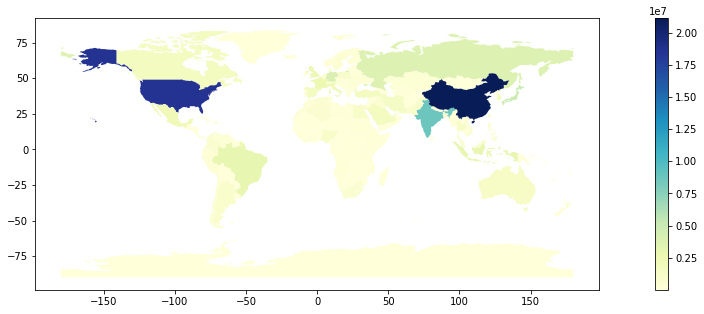

In [9]:
#https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
world.plot(figsize=(20,5), column= 'gdp_md_est', cmap='YlGnBu', legend=True)

In [10]:
import branca.colormap as cm
colormap = cm.linear.YlGnBu_09.to_step(data=world['gdp_md_est'], n=9)
colormap

In [11]:
m = folium.Map()
# Setting the style
style_function = lambda x: {
    # How to fill color of the polygon
    'fillColor': colormap(x['properties']['gdp_md_est']),
    # Color of Polygon
    'color': 'black',
    # Weight of the border (Around the Polygon)
    'weight': 0.5,
    # Opacity of filled color
    'fillOpacity': 0.75
}

In [12]:
# Creating a geojson map with the style
folium.GeoJson(
    world,
    tooltip=folium.GeoJsonTooltip(fields= ["name", "gdp_md_est"]),
    style_function=style_function
).add_to(m)
# Add the legend to the same canvas
colormap.add_to(m)
m

## Marker Clusters

In [13]:
from folium.plugins import MarkerCluster
locations = []
# City location geometries to a list of latlongs pairs  
for idx, row in gdf.iterrows():
    locations.append([row['geometry'].y, row['geometry'].x])
# Empty canvas
m = folium.Map()
# Markercluster
m.add_child(MarkerCluster(locations=locations))
m

# Heatmap

In [14]:
from folium.plugins import HeatMap
m = folium.Map()
m.add_child(HeatMap(locations, radius=15))
m

Mo Data Mo problems 
<img src="memes/4.jpg" alt="Italian Trulli" style="text-align:center;">

# kepler.gl 


Kepler.gl is a data-agnostic, high-performance web-based application for visual exploration of large-scale geolocation data sets. Built on top of Mapbox GL and deck.gl, kepler.gl can render millions of points representing thousands of trips and perform spatial aggregations on the fly.

In [15]:
# Jupyter Notebook > 5.3
! pip install keplergl
# JupyterLab 
! jupyter labextension install @jupyter-widgets/jupyterlab-manager keplergl-jupyter

You should consider upgrading via the 'pip install --upgrade pip' command.
Traceback (most recent call last):
  File "/home/sangarshanan/.virtualenvs/jupyter/bin/jupyter", line 10, in <module>
    sys.exit(main())
  File "/home/sangarshanan/.virtualenvs/jupyter/lib/python3.6/site-packages/jupyter_core/command.py", line 230, in main
    command = _jupyter_abspath(subcommand)
  File "/home/sangarshanan/.virtualenvs/jupyter/lib/python3.6/site-packages/jupyter_core/command.py", line 133, in _jupyter_abspath
    'Jupyter command `{}` not found.'.format(jupyter_subcommand)
Exception: Jupyter command `jupyter-labextension` not found.


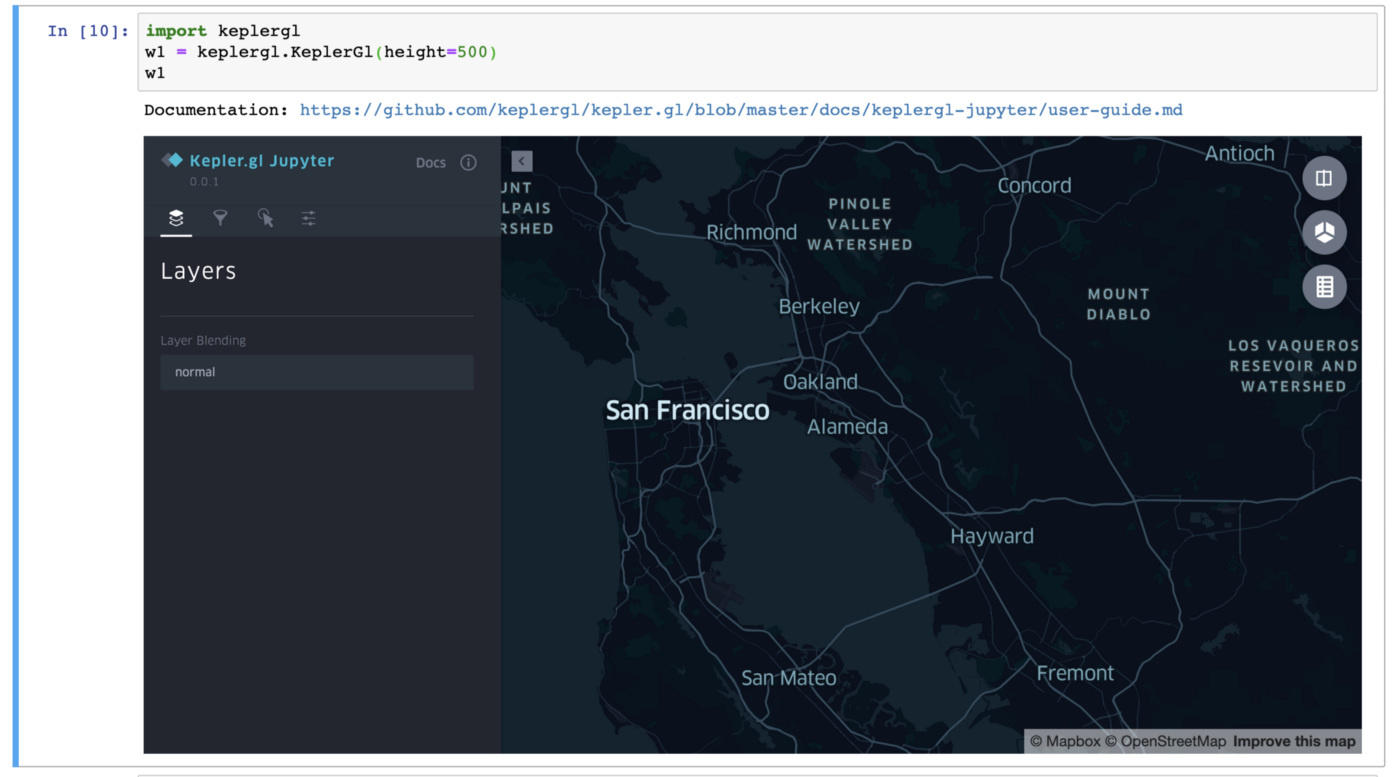

### Kepler uses config to customize its maps 

```json
{
  "version": "v1",
  "config": {
    "visState": {
      "filters": [
        {
          "dataId": "earthquakes",
          "id": "vo18yorx",
        }
      ],
      "layers": [
        {
          "id": "hty62yd",
          "type": "point",
          "config": {
            "dataId": "earthquakes",
            "label": "Point",
            "color": [
              23,
              184,
              190
            ],
            "columns": {
              "lat": "Latitude",
              "lng": "Longitude",
              "altitude": null
            },
.....
```

### The kepler.gl UX flow is composed of five layers, including hexagon, arc, and point

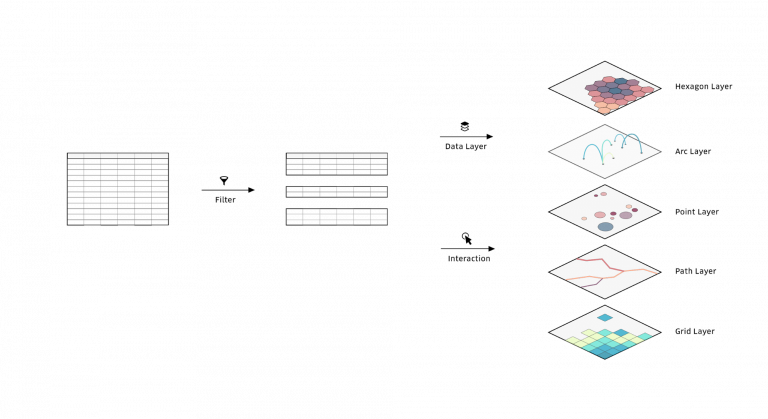

# Some Cool Kepler.gl Maps 

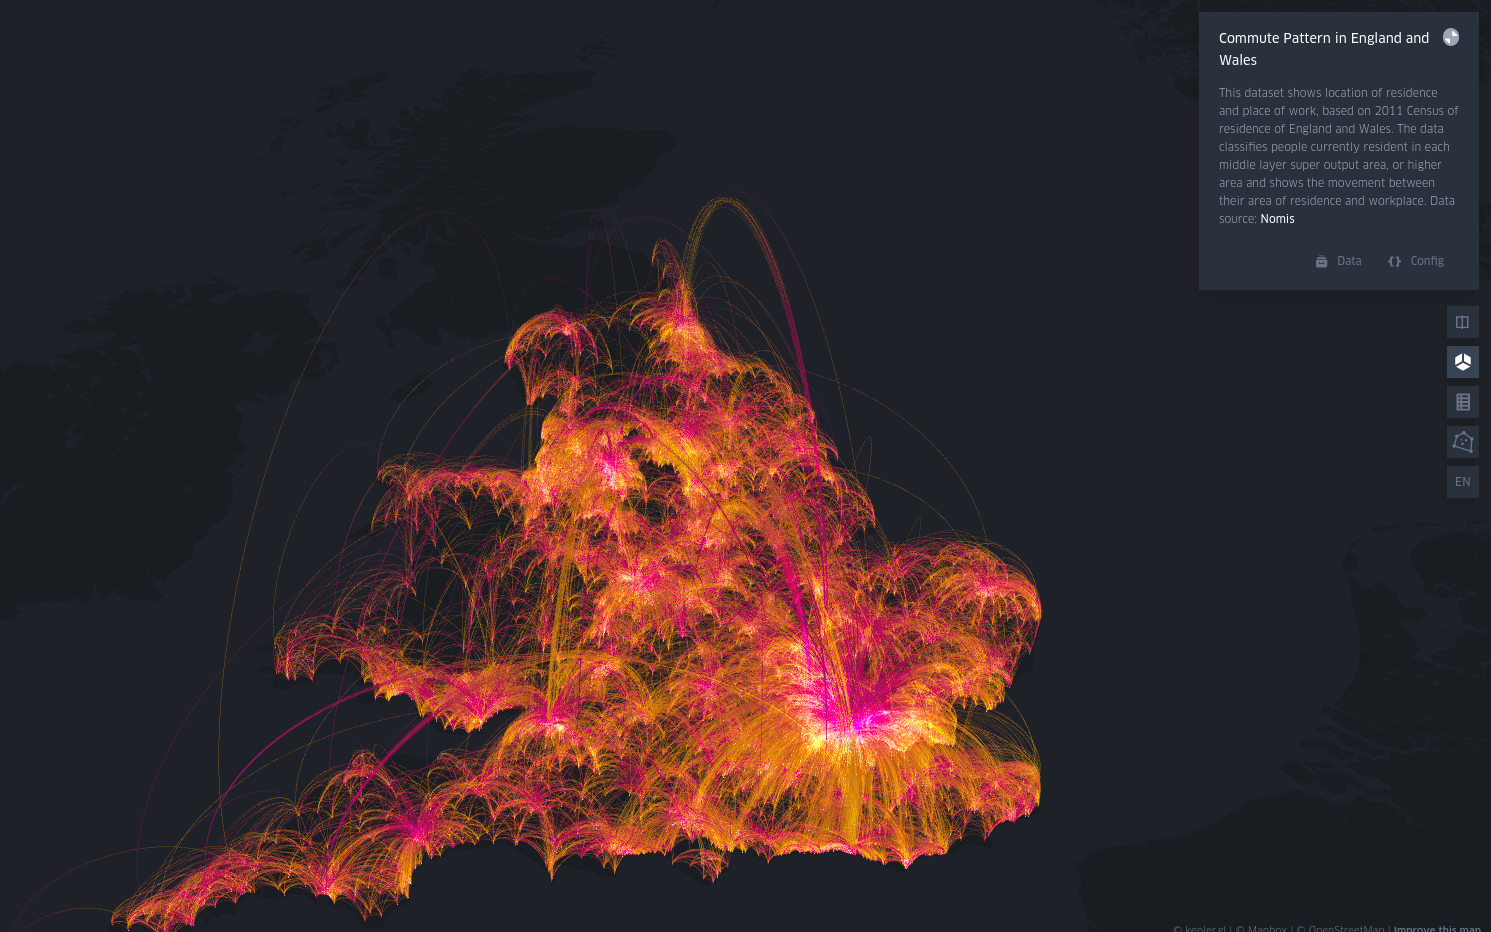


<img src="https://miro.medium.com/max/700/1*04E7z_uxsSm--7BNH9FRbg.gif
" alt="Italian Trulli" style="text-align:center;">

<img src="memes/5.jpg" alt="Italian Trulli" style="text-align:center;">

## Bokeh

In [16]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, output_file, show
from bokeh.tile_providers import CARTODBPOSITRON, get_provider
output_notebook()
tile_provider = get_provider(CARTODBPOSITRON)
p = figure(x_range=(-2000000, 6000000), y_range=(-1000000, 7000000),
           x_axis_type="mercator", y_axis_type="mercator")
p.add_tile(tile_provider)
show(p)

Loading BokehJS ...

## Plotly

In [17]:
import plotly.express as px
df = px.data.carshare()
fig = px.scatter_mapbox(df, lat="centroid_lat", lon="centroid_lon", color="peak_hour", size="car_hours",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10,
                  mapbox_style="carto-positron")
fig.show()

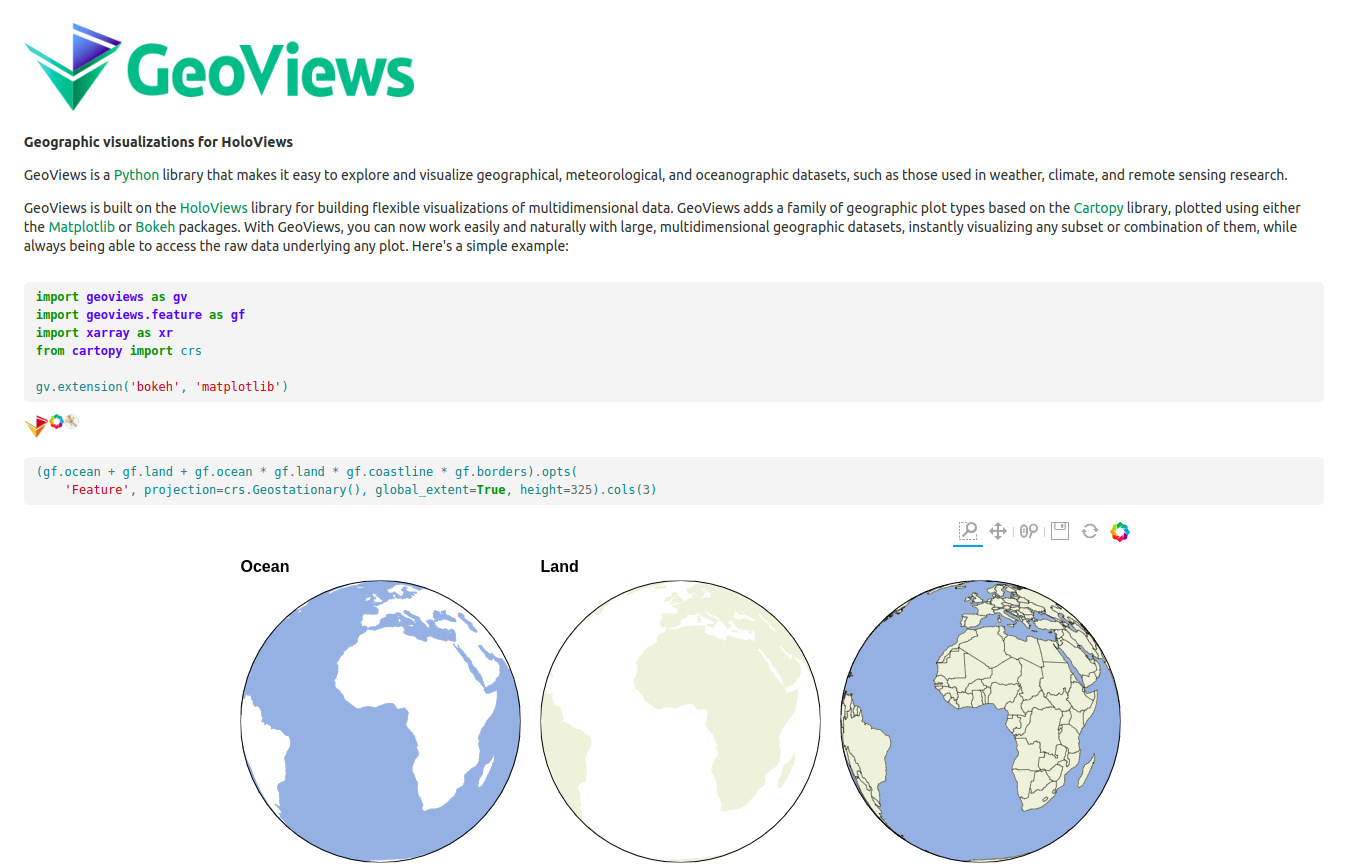

## Say hello to Geopatra 

In [21]:
import geopatra
gdf.folium.plot(zoom=2)

# Yet another one, why ? 

- Different libraries have different APIs


- All of them are awesome and have something new and exciting and offer 


- Netflix Syndrome 

- I wanna be able to switch between them without having to remember all the interfaces/ spend time googling 